## I.  Fully Convolutional One-Stage Object Detection

The FCOS model is based on the [FCOS: Fully Convolutional One-Stage Object Detection](https://arxiv.org/abs/1904.01355) paper.



In [1]:
# Note that this script was pulled from here: https://pytorch.org/vision/main/models#object-detection
# Imports
from torchvision.io.image import read_image
import torchvision

# Explore the torchvision documentation to apply the other models and their weights
from torchvision.models.detection import fcos_resnet50_fpn, FCOS_ResNet50_FPN_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image
from IPython.display import display

In [2]:
# Reading in a sample image from the `America` image folder from the Free to Reuse Data Package
img = read_image("../images/image_1.jpg")

/Users/aisaiahpellecer/Desktop/lclabs-jfp24/loc_env/lib/python3.9/site-packages/torchvision/utils.py:223: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


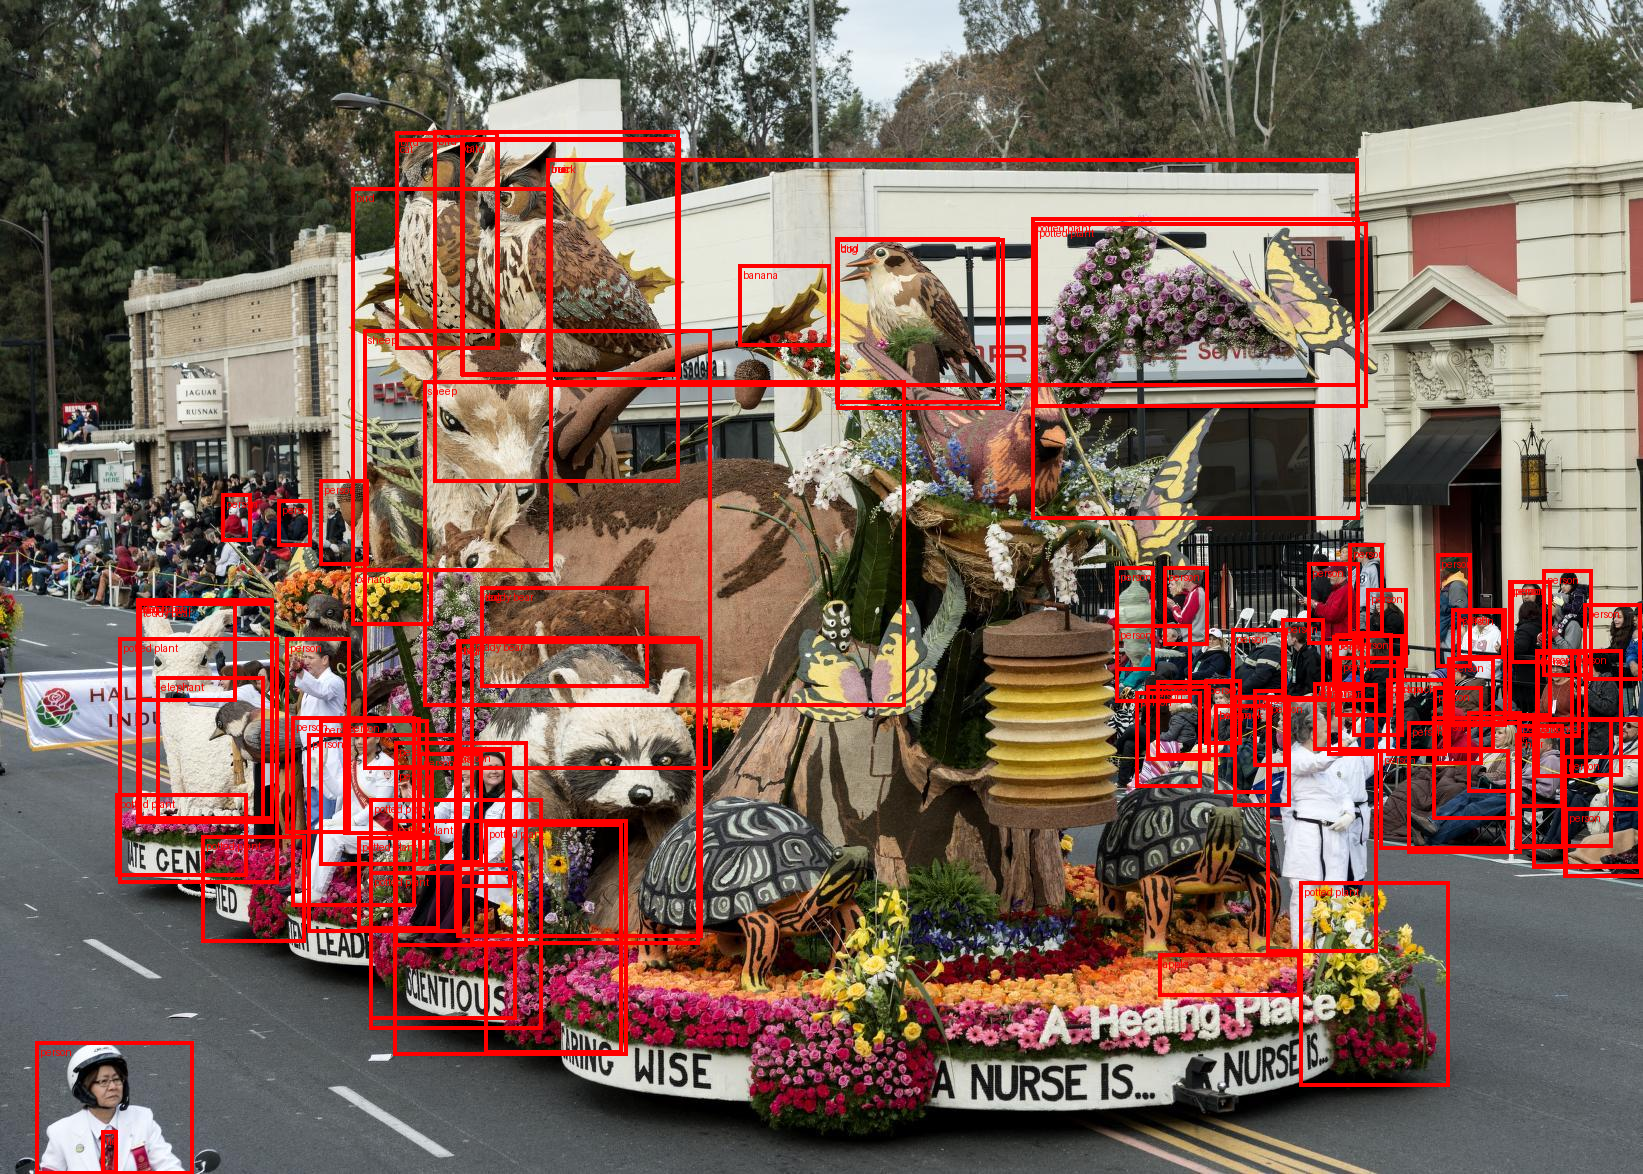

In [3]:
# Step 1: Initialize model with the best available weights
weights = FCOS_ResNet50_FPN_Weights.DEFAULT
model = torchvision.models.detection.fcos_resnet50_fpn(weights=weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
labels = [weights.meta["categories"][i] for i in prediction["labels"]]
box = draw_bounding_boxes(
    img, boxes=prediction["boxes"], labels=labels, colors="red", width=4, font_size=30
)
im = to_pil_image(box.detach())
# im.show()

# Displays the Image
display(im)

### V. Experimentation

Use images from the _images/_ folder to test the model's performance and test out different box_score_thresholds.

In [4]:
def object_detection(image_path, threshold=0.9):
    image_path = '../' + image_path
    img = read_image(image_path)
    weights = FCOS_ResNet50_FPN_Weights.DEFAULT
    model = torchvision.models.detection.fcos_resnet50_fpn(weights=weights)
    model.eval()

    # Step 2: Initialize the inference transforms
    preprocess = weights.transforms()

    # Step 3: Apply inference preprocessing transforms
    batch = [preprocess(img)]

    # Step 4: Use the model and visualize the prediction
    prediction = model(batch)[0]
    labels = [weights.meta["categories"][i] for i in prediction["labels"]]
    box = draw_bounding_boxes(
        img,
        boxes=prediction["boxes"],
        labels=labels,
        colors="red",
        width=4,
        font_size=30,
    )
    im = to_pil_image(box.detach())
    # im.show()

    # Displays the Image
    display(im)

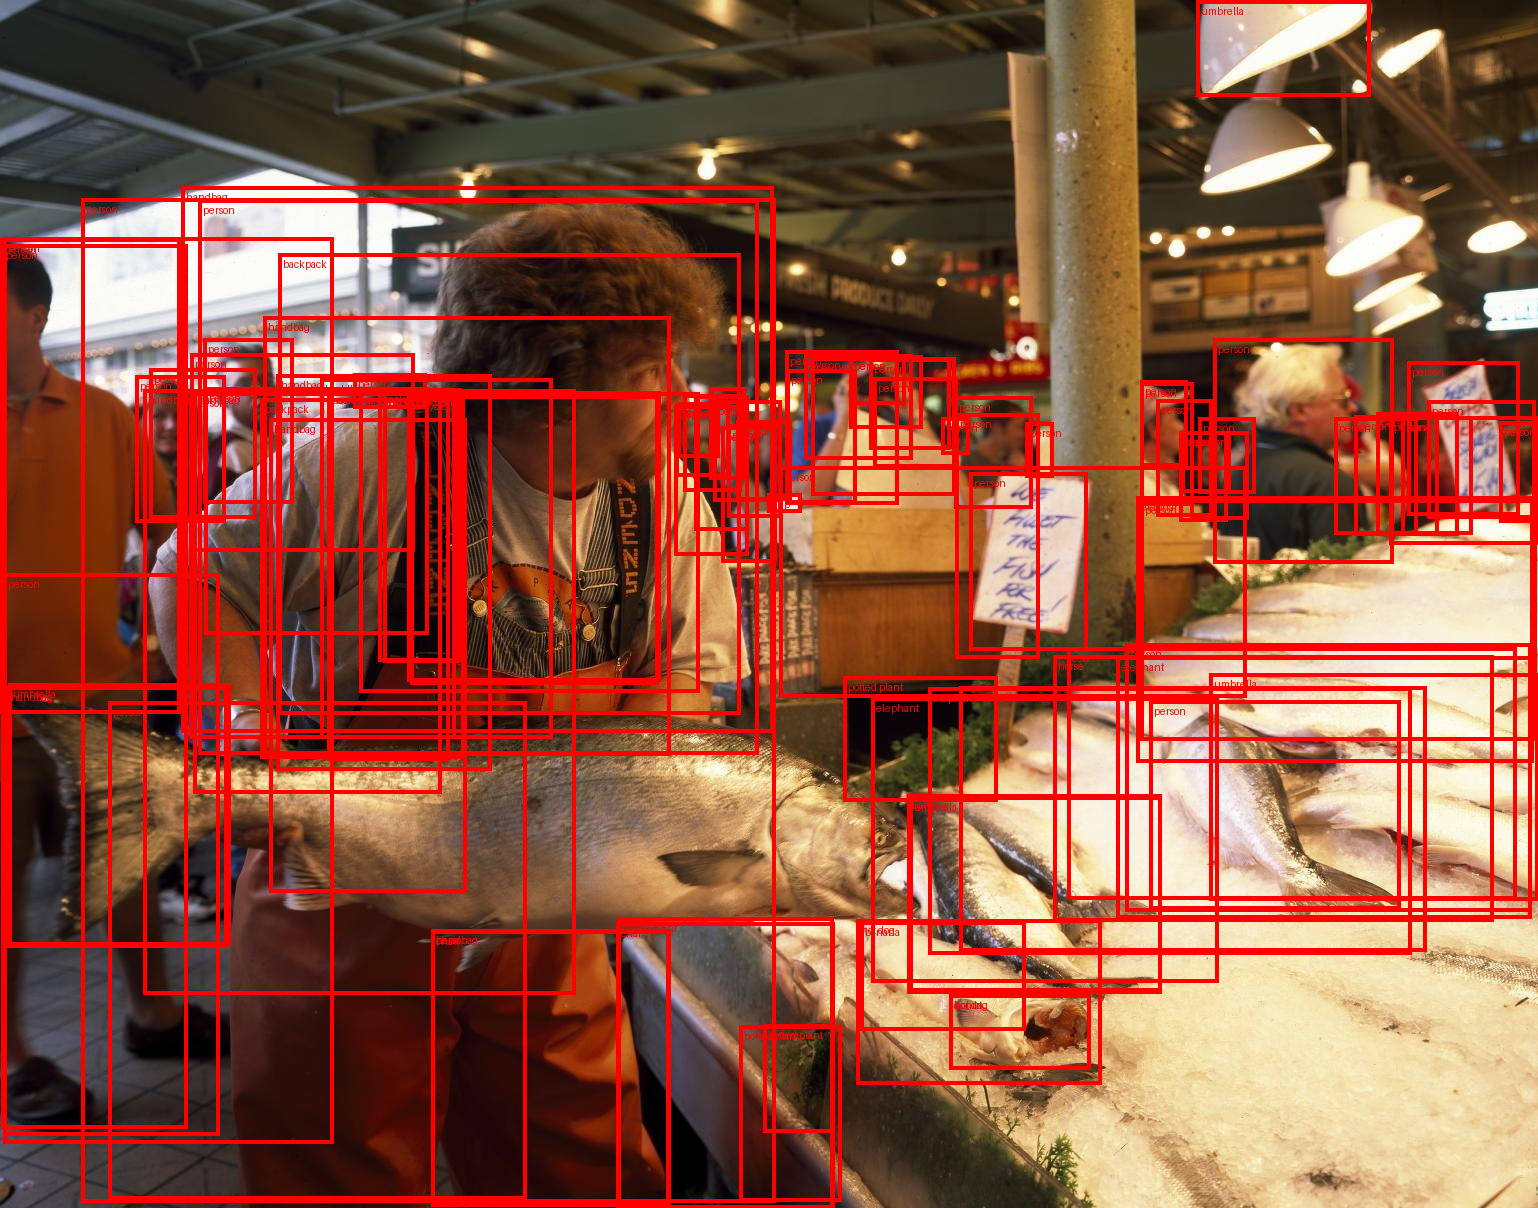

In [5]:
object_detection("images/image_28.jpg")

In [6]:
# object_detection('images/image_35.jpg',0.5)

In [7]:
# object_detection('images/image_30.jpg',0.7)